In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn import ensemble
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import string
from textblob import TextBlob,Word
import nltk


from nltk.tokenize import word_tokenize
from nltk.corpus import words,wordnet
from nltk.stem import WordNetLemmatizer

%matplotlib inline

In [2]:
d1 = pd.read_csv("files/tweet_filtered_strict_ind_bad.csv")
d2 = pd.read_csv("files/tweet_filtered_strict_full.csv")
data = pd.concat([d1,d2])

In [3]:
data.shape

(96318, 4)

In [4]:
data.isnull().sum()

Unnamed: 0        0
tweet           996
polarity          0
subjectivity      0
dtype: int64

In [5]:
data.dropna(inplace=True)
data.shape

(95322, 4)

 Filter sentences if it has minimum of 5 words
 
 
 

In [6]:
data["filtered_sentence"]=data.tweet.apply(lambda x: x if(len(x.split())>2) else None)

In [7]:
data.isnull().sum()

Unnamed: 0              0
tweet                   0
polarity                0
subjectivity            0
filtered_sentence    4529
dtype: int64

In [8]:
data.dropna(inplace=True)
data.shape

(90793, 5)

In [10]:
tweets=data

In [11]:
sent = lambda x: 1 if(x>=0) else 0
tweets["sentiment"]=tweets.polarity.apply(sent)

In [12]:
indexNames = tweets[(tweets["polarity"]<= 0.2) & (tweets["polarity"]>= 0) ].index
indexNames.shape

(43473,)

In [13]:
tweets.drop(indexNames , inplace=True)

In [14]:
tweets.sentiment.value_counts()

0    20194
1    13990
Name: sentiment, dtype: int64

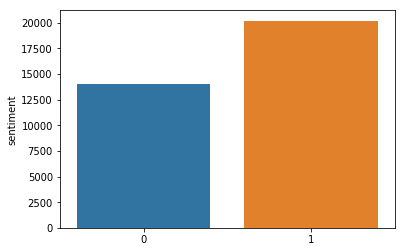

In [15]:
sns.barplot(x=[1,0],y=tweets.sentiment.value_counts(),data=tweets)

In [16]:
data_base=tweets.tweet.tolist()
total_words=[]                      # All words
for i in data_base:
    for j in i.split():
        j=j.lower()
        total_words.append(j)
print("Total words = ",len(total_words))

Total words =  690732


In [17]:
w_c=pd.DataFrame(data=total_words,columns=["words"])
w_c.shape

(690732, 1)

In [18]:
w_c_filtered=w_c[w_c["words"].map(w_c["words"].value_counts())>2]
w_c_filtered.shape

(683455, 1)

In [19]:
w_c_filtered =pd.DataFrame(data= w_c_filtered["words"].unique() , columns=["words"])
w_c_filtered.shape

(6738, 1)

In [20]:
all_words=w_c_filtered.words.tolist()

In [21]:
flt_wrds = all_words

In [22]:
flt_wrd_set=set(flt_wrds)
wrd_chk = lambda x:1 if len((set(x.split()).intersection(flt_wrd_set)))>=1 else None

In [23]:
tweets["word_chk"]=tweets.tweet.apply(wrd_chk)

In [24]:
tweets.isnull().sum()

Unnamed: 0           0
tweet                0
polarity             0
subjectivity         0
filtered_sentence    0
sentiment            0
word_chk             0
dtype: int64

In [25]:
tweets.dropna(inplace=True)

In [26]:
tweets.shape

(34184, 7)

## Word count vector represent and model training - - - - - -

In [27]:
word_vector=[]
for i in tweets.tweet:
    i=i.lower()
    mat=[i.count(j) for j in flt_wrds]
    word_vector.append(mat)

In [28]:
X_count_vect = pd.DataFrame(word_vector,columns=flt_wrds)
X_count_vect.shape

(34184, 6738)

In [29]:
y=tweets.sentiment

In [30]:
y.shape

(34184,)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_count_vect,y,test_size=0.25,random_state=3)

In [32]:
def reports(ytrue,predicted):
    print("Accuracy : {}".format(metrics.accuracy_score(ytrue,predicted)))
    print("Precision : {}".format(metrics.precision_score(ytrue,predicted)))
    print("Recall : {}".format(metrics.recall_score(ytrue,predicted)))
    print("Logloss : {}".format(metrics.log_loss(ytrue,predicted)))
    print("F1 Score : {}".format(metrics.f1_score(ytrue,predicted)))
    print("AUC : {}".format(metrics.roc_auc_score(ytrue,predicted)))
    print("Confusion Matrix : \n{}".format(metrics.confusion_matrix(ytrue,predicted)))

In [33]:
def all_models_report():
    
    global X_train
    global y_train
    global X_test
    global y_test
    
                # Random Forest Model
    
    
    rfst=ensemble.RandomForestClassifier(n_estimators=10)
    rfst.fit(X_train,y_train)
    rfst_pred =rfst.predict(X_test)
    print("\n\nFor Random Forest\n")
    reports(y_test,rfst_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test,rfst_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.suptitle('AUC-ROC Curve', fontsize=20)
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
    
    
    
                # Decision Tree Model
    
    dst = tree.DecisionTreeClassifier()
    dst.fit(X_train,y_train)
    dst_pred = dst.predict(X_test)
    print("\n\nFor Decision Tree\n")
    reports(y_test,dst_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test,dst_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.suptitle('AUC-ROC Curve', fontsize=20)
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
    
    
                    # Logistic Regression Model
    
    lgs = linear_model.LogisticRegression()
    lgs.fit(X_train,y_train)
    lgr_pred=lgs.predict(X_test)
    print("\n\nFor Logistic Regression\n")
    reports(y_test,lgr_pred)
    
    fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.suptitle('AUC-ROC Curve', fontsize=20)
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
    
    
    
                    #  Gaussian Naive Bayes Model
    
    clf1= GaussianNB()
    clf1.fit(X_train,y_train)
    y_pred_gnb=clf1.predict(X_test)
    print("\n\nFor Gaussian Naive Bayes : \n")
    reports(y_test,y_pred_gnb)
    
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_gnb)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.suptitle('AUC-ROC Curve', fontsize=20)
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    
    
    
    
                # Multinomial Naive Bayes Model
    
    clf2= MultinomialNB()
    clf2.fit(X_train,y_train)
    y_pred_mnb=clf2.predict(X_test)
    print("\n\nFor Multinomial Naive Bayes : \n")
    reports(y_test,y_pred_mnb)
    
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_mnb)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr, marker='.')
    plt.suptitle('AUC-ROC Curve', fontsize=20)
    plt.xlabel('False positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()



For Random Forest

Accuracy : 0.8357126140884624
Precision : 0.8681397006414825
Recall : 0.7020172910662824
Logloss : 5.6743199051607505
F1 Score : 0.7762906309751434
AUC : 0.8145626250445674
Confusion Matrix : 
[[4706  370]
 [1034 2436]]


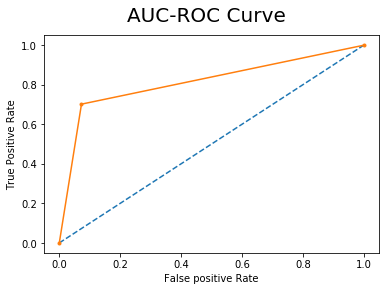



For Decision Tree

Accuracy : 0.9056868710507839
Precision : 0.875
Recall : 0.8956772334293948
Logloss : 3.2575016142706557
F1 Score : 0.8852178866419823
AUC : 0.904103392128409
Confusion Matrix : 
[[4632  444]
 [ 362 3108]]


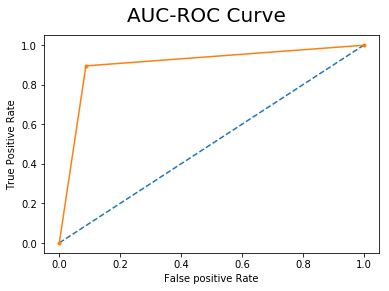

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




For Logistic Regression

Accuracy : 0.9593962087526328
Precision : 0.946525593365742
Recall : 0.9538904899135446
Logloss : 1.4024227631352049
F1 Score : 0.9501937706329839
AUC : 0.9585252291963311
Confusion Matrix : 
[[4889  187]
 [ 160 3310]]


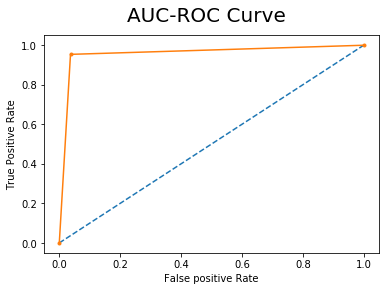



For Gaussian Naive Bayes : 

Accuracy : 0.6029721507137842
Precision : 0.5065465056963101
Recall : 0.8585014409221902
Logloss : 13.71312763160243
F1 Score : 0.6371511068334937
AUC : 0.6433957165209847
Confusion Matrix : 
[[2174 2902]
 [ 491 2979]]


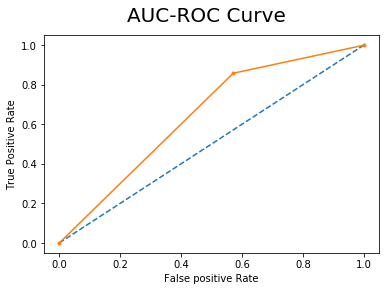



For Multinomial Naive Bayes : 

Accuracy : 0.8761993915282004
Precision : 0.8445714285714285
Recall : 0.8518731988472622
Logloss : 4.275972432344669
F1 Score : 0.8482065997130559
AUC : 0.87235109902962
Confusion Matrix : 
[[4532  544]
 [ 514 2956]]


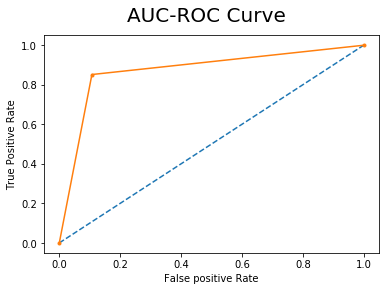

In [34]:
all_models_report()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)




For Logistic Regression : Solver - Lbfgs

Accuracy : 0.9558962264150943
Precision : 0.9509832697387731
Recall : 0.9399477806788512
Logloss : 1.5233061208098402
F1 Score : 0.9454333236066531
AUC : 0.9533833876571288
Confusion Matrix : 
[[4866  167]
 [ 207 3240]]


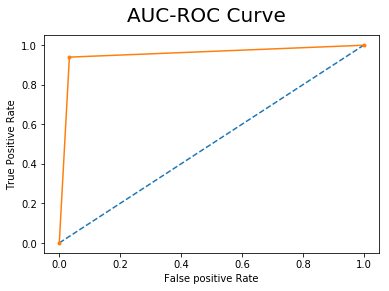

In [43]:
lgs = linear_model.LogisticRegression(solver="lbfgs")

lgs.fit(X_train,y_train)
lgr_pred=lgs.predict(X_test)
print("\n\nFor Logistic Regression : Solver - Lbfgs\n")
reports(y_test,lgr_pred)

fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.suptitle('AUC-ROC Curve', fontsize=20)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()




For Logistic Regression : Solver - Liblinear

Accuracy : 0.9620283018867924
Precision : 0.9570049722140976
Recall : 0.9492312155497534
Logloss : 1.3115098514131467
F1 Score : 0.9531022429362075
AUC : 0.9600119916413579
Confusion Matrix : 
[[4886  147]
 [ 175 3272]]


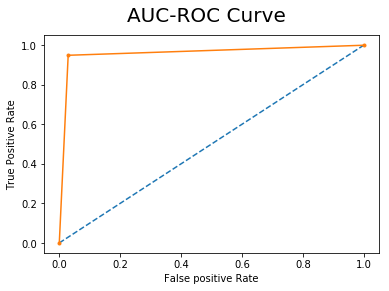

In [44]:
lgs = linear_model.LogisticRegression(solver="liblinear")

lgs.fit(X_train,y_train)
lgr_pred=lgs.predict(X_test)
print("\n\nFor Logistic Regression : Solver - Liblinear\n")
reports(y_test,lgr_pred)

fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.suptitle('AUC-ROC Curve', fontsize=20)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)




For Logistic Regression : Solver - Saga

Accuracy : 0.9511792452830189
Precision : 0.9443305010254908
Recall : 0.9350159559036844
Logloss : 1.6862270461090525
F1 Score : 0.9396501457725948
AUC : 0.9486325557384506
Confusion Matrix : 
[[4843  190]
 [ 224 3223]]


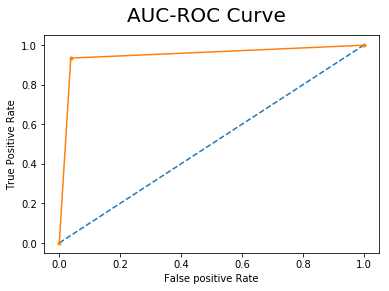

In [45]:
lgs = linear_model.LogisticRegression(solver="saga",penalty="l1")

lgs.fit(X_train,y_train)
lgr_pred=lgs.predict(X_test)
print("\n\nFor Logistic Regression : Solver - Saga\n")
reports(y_test,lgr_pred)

fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.suptitle('AUC-ROC Curve', fontsize=20)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()



For Logistic Regression : Solver - Newton-CG

Accuracy : 0.9620283018867924
Precision : 0.9570049722140976
Recall : 0.9492312155497534
Logloss : 1.3115098514131467
F1 Score : 0.9531022429362075
AUC : 0.9600119916413579
Confusion Matrix : 
[[4886  147]
 [ 175 3272]]


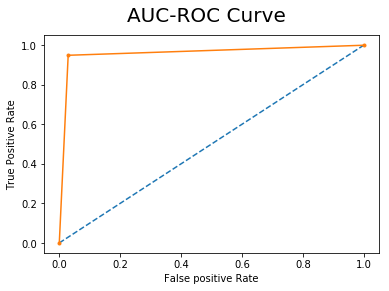

In [46]:
lgs = linear_model.LogisticRegression(solver="newton-cg",penalty="l2")

lgs.fit(X_train,y_train)
lgr_pred=lgs.predict(X_test)
print("\n\nFor Logistic Regression : Solver - Newton-CG\n")
reports(y_test,lgr_pred)

fpr, tpr, thresholds = roc_curve(y_test,lgr_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.suptitle('AUC-ROC Curve', fontsize=20)
plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [47]:
#HappyEmoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])



# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])


emoticons = emoticons_happy.union(emoticons_sad)


special_char=re.compile(r'[-%<>.?!,;#:/\\()^~`$₹+\'*&_{}=|0-9]')  # All special characters

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\u200b"
        "\n"
        "❌▶◾✔️➕➖•❤•●⭐🤝✌🤟🤩🤪🤣🤗"         "]+", flags=re.UNICODE)


#stop_words = set(stopwords.words('english'))
corp=words.words()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def clean_text(tweet):    
    tweet = tweet.lower()
    #global stop_words
    global emoticons
    global emoji_pattern
    global special_char
    global corp
    lemmatizer = WordNetLemmatizer() 

    #tweet = re.sub('@.*? |#.*? |@.*?: |#.*?: |@.*?:|#.*?:', '', tweet)
    tweet = re.sub('@.*? |@.*?:', '', tweet)
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    tweet = re.sub(r'https?:\/\/.*|http?:\/\/.*',"",tweet)
    tweet =re.sub("b\"RT|b\'|b\"|b\'RT|b\'rt|b\"rt|\\n|\\\\n|RT", '', tweet)
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    tweet = emoji_pattern.sub(r'', tweet)
    tweet = special_char.sub(r" ",tweet)
    
    word_tokens = word_tokenize(tweet)

    filtered_tweet = []
    for w in word_tokens:
        if ((w in corp)  and (w not in emoticons) and (w not in string.punctuation)  and (len(w)>1)):
            filtered_tweet.append(w)
            
    
    filtered_tweets=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in filtered_tweet]        
    filtered_sentence = ' '.join(filtered_tweets)
    return filtered_sentence

In [48]:
def pred_text(text):
    global lgs
    global flt_wrds
    text = clean_text(text)
    i=text.lower()
    mat=[i.count(j) for j in flt_wrds]
    lgr_pred=lgs.predict([mat])
    
    
    if(lgr_pred==1):
        print("Logistic Regression Prediction : POSITIVE")
        
    else:
        print("Logistic Regression Prediction : NEGATIVE")

In [49]:
pred_text("Hi i am a good boy.")

Logistic Regression Prediction : POSITIVE


In [50]:
pred_text("Rohit is so dumb")

Logistic Regression Prediction : NEGATIVE


In [51]:
pred_text("Pubg lite has poor graphics quality")

Logistic Regression Prediction : NEGATIVE


In [52]:
pred_text("This project is very interesting. but very time consuming. code is very long")

Logistic Regression Prediction : NEGATIVE


In [53]:
pred_text("This project is very interesting.")

Logistic Regression Prediction : POSITIVE


In [97]:
pred_text("i hope one day this pandemic situation will be over")

Logistic Regression Prediction : POSITIVE


In [59]:
pred_text("Feeling depressed on this pandemic situation.")

Logistic Regression Prediction : NEGATIVE


In [66]:
pred_text("in this lockdown period i have learned so many new things")

Logistic Regression Prediction : POSITIVE


In [85]:
pred_text("in this quarantine period, our environment is curing.")

Logistic Regression Prediction : POSITIVE


In [95]:
pred_text("i am mentally disturbed during the quarantine")

Logistic Regression Prediction : NEGATIVE


In [99]:
pred_text("India is fighting the pandemic situation greatly.")

Logistic Regression Prediction : POSITIVE


In [102]:
pred_text("Our central government has failed to handle the pandemic situation.")

Logistic Regression Prediction : NEGATIVE


In [74]:
pred_text("Rainy season is best for the plants")

Logistic Regression Prediction : POSITIVE


In [83]:
pred_text("The boy is smart")

Logistic Regression Prediction : POSITIVE
